In [1]:
import sys
sys.path.append("../")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde

In [3]:
from helpers import read_configuration_file
from helpers import WindowType
from train import load_regions
from train import load_clusters
from train import load_regions

In [4]:
configuration=read_configuration_file("../config.json")
configuration["regions_files"]=["/home/a/ag568/region_0_MANHATAN_3_MEAN_RATIO.txt"]
clusters = {
    "cluster_0":{"filename":"EMPTY", "state":"EMPTY", "distributions":{} },
    "cluster_1":{"filename":"EMPTY", "state":"EMPTY", "distributions":{}},
    "cluster_2":{"filename":"EMPTY", "state":"EMPTY", "distributions":{}}
    }

clusters["cluster_0"]["filename"]="/home/a/ag568/cluster_0_MANHATAN_3_MEAN_RATIO.txt"
clusters["cluster_0"]["state"]="state_0"

clusters["cluster_1"]["filename"]="/home/a/ag568/cluster_1_MANHATAN_3_MEAN_RATIO.txt"
clusters["cluster_1"]["state"]="state_1"

clusters["cluster_2"]["filename"]="/home/a/ag568/cluster_2_MANHATAN_3_MEAN_RATIO.txt"
clusters["cluster_2"]["state"]="state_2"
configuration["clusters"] = clusters

In [5]:
clusters = load_clusters(configuration=configuration)

INFO: Load clusters
INFO: Loading cluster from file: /home/a/ag568/cluster_0_MANHATAN_3_MEAN_RATIO.txt
INFO: Loading cluster from file: /home/a/ag568/cluster_1_MANHATAN_3_MEAN_RATIO.txt
INFO: Loading cluster from file: /home/a/ag568/cluster_2_MANHATAN_3_MEAN_RATIO.txt
INFO: Done. Execution time 0.06111330911517143 secs


In [6]:
regions = load_regions(configuration=configuration)

INFO: Load regions...
INFO: Loading region from file: /home/a/ag568/region_0_MANHATAN_3_MEAN_RATIO.txt
INFO: Check window sanity for region 0
INFO: Done...
INFO: Done. Execution time 7.999999423976988 secs


In [7]:
for cluster in clusters:
    cluster.windows = regions[0].get_mixed_windows()

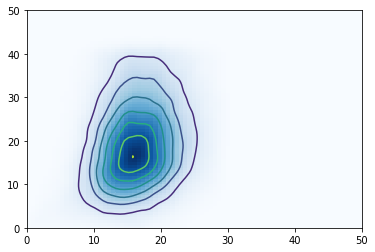

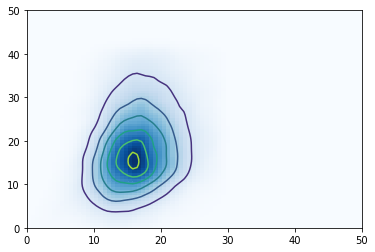

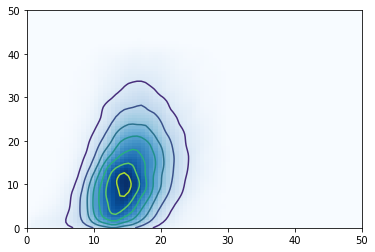

In [10]:
nbins = 80
min_ = 0.0
max_ = 50.0

for cluster in clusters:
    wga_mean_seq = cluster.get_rd_sequnce(statistic="mean", wtype=WindowType.WGA, exclude_gaps=True)
    no_wga_mean_seq = cluster.get_rd_sequnce(statistic="mean", wtype=WindowType.NO_WGA, exclude_gaps=True)
    
    plt.hist2d(no_wga_mean_seq, wga_mean_seq,
                 bins=[nbins, nbins], cmap='Blues', density=False,
                 cmax=1000,
                 cmin=0,
                 alpha=0.99,
                 range=((min_, max_), (min_, max_)))
    plt.title = "Hist 2D"
    #plt.show()
    
    kernel= kde.gaussian_kde(np.vstack([no_wga_mean_seq, wga_mean_seq]))
    xi, yi = np.mgrid[min_:max_:nbins*1j,
                      min_:max_:nbins*1j]
    zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
    plt.title='Gaussian KDE'
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') #plt.cm.BuGn_r)
    plt.contour(xi, yi, zi.reshape(xi.shape) )
    plt.show()
    